# In Vehicle Coupon Recommendation

* The gold of this project is to predict whether a driver would accept the recommended coupon in a certain situation. 

# Model: Support Vector Classifier

* Support Vector Classifier is the best model selected from the pervious model selection test for the In Vehicle Coupon Recommendation data set. 

* In this model, I would train the model again and get the final data of the Support Vector Classifier.

# Imports 

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix,classification_report, confusion_matrix,roc_auc_score, plot_roc_curve

# Load the data 

In [2]:
path  = '/content/drive/MyDrive/Springboard/CapstoneProject2/data/coupon_data2.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,...,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,temperature_30,temperature_55,temperature_80,has_children_0,has_children_1,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1,Y
0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
2,2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1
3,3,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
4,4,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0


In [3]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [4]:
df.shape

(12007, 114)

# Split the data into train and test set

In [5]:
X = df.iloc[:,:113]
y = df.iloc[:,113]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(9605, 113)

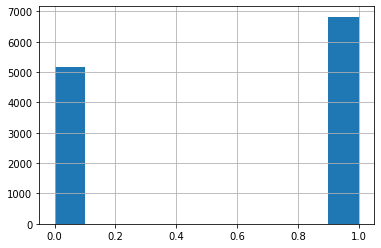

In [8]:
y.hist()

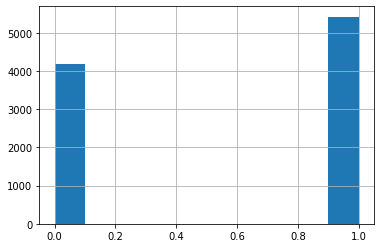

In [9]:
y_train.hist()

# Create the Support Vector Classifier model

In [10]:
svc = svc = SVC(gamma='scale',kernel='poly')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

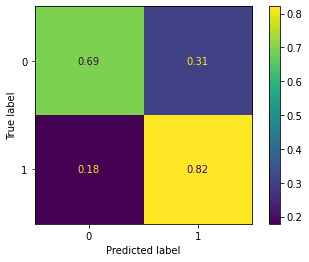

In [11]:
plot_confusion_matrix(svc, X_test, y_test,normalize='true')  

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1004
           1       0.79      0.82      0.80      1398

    accuracy                           0.77      2402
   macro avg       0.76      0.76      0.76      2402
weighted avg       0.77      0.77      0.77      2402



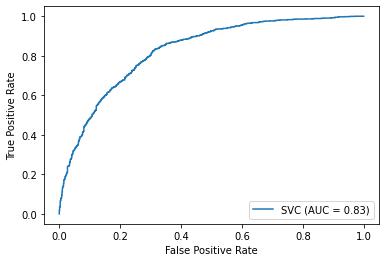

In [13]:
plot_roc_curve(svc, X_test,y_test)
plt.show()

In [14]:
roc_auc_score(y_test, y_pred)

0.7572000980341865

# Model Information

In [15]:
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
model_info = [{'modelFeatures': 'all features',
              'modelInfo': svc,
              'modelHyperparameters': {'gamma':'scale','kernel':'poly'},
              'modelPerformanceMetrics': confusion_matrix(y_test, y_pred),
              'classificationReport': classification_report(y_test, y_pred),
              'ROC-AUC Score': 0.90
              }]
model_info

[{'ROC-AUC Score': 0.9,
  'classificationReport': '              precision    recall  f1-score   support\n\n           0       0.74      0.69      0.71      1004\n           1       0.79      0.82      0.80      1398\n\n    accuracy                           0.77      2402\n   macro avg       0.76      0.76      0.76      2402\nweighted avg       0.77      0.77      0.77      2402\n',
  'modelFeatures': 'all features',
  'modelHyperparameters': {'gamma': 'scale', 'kernel': 'poly'},
  'modelInfo': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  'modelPerformanceMetrics': array([[ 696,  308],
         [ 250, 1148]])}]

# Save the Model Information to txt file

In [18]:
csv_file = "/content/drive/MyDrive/Springboard/CapstoneProject2/SupportVectorClassifierInfo.txt"
f = open(csv_file,"w")
f.write(str(model_info))
f.close()

In [ ]:
f = open(csv_file,"r")
f.read()

"[{'modelFeatures': 'all features', 'modelInfo': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,\n    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',\n    max_iter=-1, probability=False, random_state=None, shrinking=True,\n    tol=0.001, verbose=False), 'modelHyperparameters': {'gamma': 'scale', 'kernel': 'poly'}, 'modelPerformanceMetrics': array([[ 849,  155],\n       [  62, 1336]]), 'classificationReport': '              precision    recall  f1-score   support\\n\\n           0       0.93      0.85      0.89      1004\\n           1       0.90      0.96      0.92      1398\\n\\n    accuracy                           0.91      2402\\n   macro avg       0.91      0.90      0.91      2402\\nweighted avg       0.91      0.91      0.91      2402\\n', 'ROC-AUC Score': 0.9}]"